In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from acquire import get_telco_data
from wrangle import wrangle_telco

In [2]:
df = wrangle_telco()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,monthly_charges_scaled,tenure_3_or_less
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,...,Yes,No,Yes,2,2,1,No,False,0.471144,False
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,...,No,Yes,No,1,2,1,No,False,0.414428,False
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,...,No,No,Yes,1,1,2,Yes,False,0.553731,False
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,...,Yes,Yes,Yes,1,1,2,Yes,False,0.793532,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,...,Yes,No,Yes,1,2,2,Yes,False,0.653234,True


In [4]:
df.streaming_tv

0       Yes
1        No
2        No
3       Yes
4       Yes
       ... 
7038     No
7039     No
7040     No
7041     No
7042    Yes
Name: streaming_tv, Length: 7043, dtype: object

### encode

In [5]:
# step 1 split
train, test = train_test_split(df)

In [6]:
# step 2 encode, no = 0, yes = 1 
encoder = LabelEncoder()

encode_list = [
    'gender', 'partner', 'dependents', 'phone_service'
    , 'multiple_lines', 'online_security', 'online_backup'
    , 'device_protection', 'tech_support'
    , 'streaming_movies', 'streaming_tv', 'paperless_billing', 'churn'
    ]
               
               
               
for c in encode_list:
    train[c] = encoder.fit_transform(train[c])
    test[c] = encoder.transform(test[c])

In [7]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,monthly_charges_scaled,tenure_3_or_less
3925,5522-NYKPB,1,0,1,1,25,85.90,2199.05,1,0,...,2,0,0,1,1,2,0,False,0.673134,False
5506,7753-USQYQ,1,0,0,0,55,64.20,3627.30,1,0,...,0,2,1,2,1,1,0,False,0.457214,False
21,0023-XUOPT,0,0,1,0,13,94.10,1215.60,1,2,...,2,0,0,1,1,2,1,False,0.754726,False
3002,4298-OYIFC,1,0,1,0,15,103.45,1539.80,1,2,...,2,2,1,1,1,2,0,False,0.847761,False
3429,4859-ZSRDZ,0,0,1,1,58,55.50,3166.90,0,1,...,2,2,1,3,4,1,0,True,0.370647,False


### Distribution of churn rates

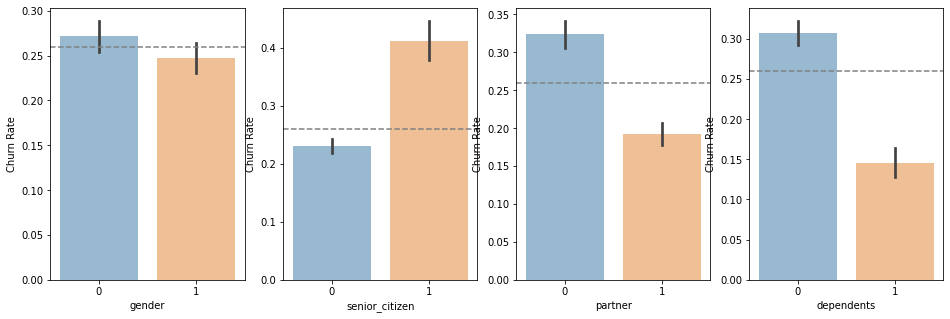

In [8]:
features = ['gender', 'senior_citizen', 'partner', 'dependents']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')


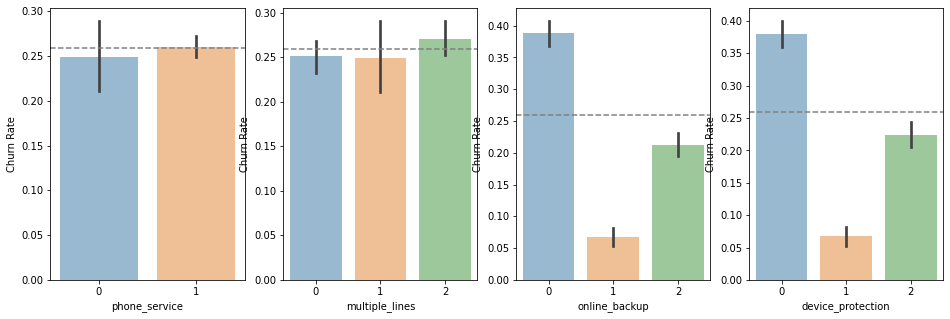

In [9]:
features = ['phone_service', 'multiple_lines', 'online_backup', 'device_protection']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [10]:
df.device_protection

0        No
1        No
2       Yes
3       Yes
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042    Yes
Name: device_protection, Length: 7043, dtype: object

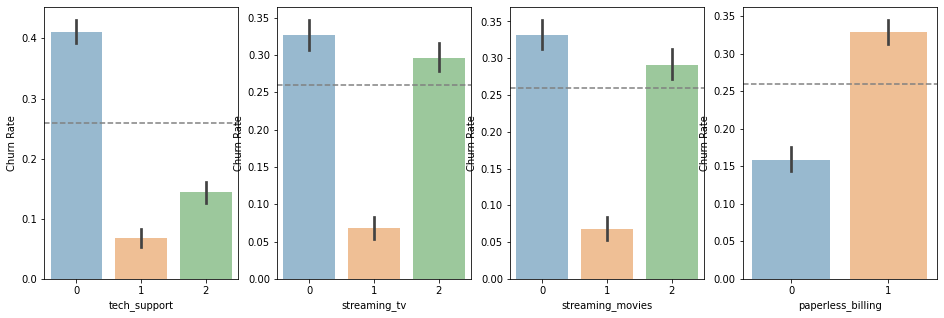

In [11]:
features = ['tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

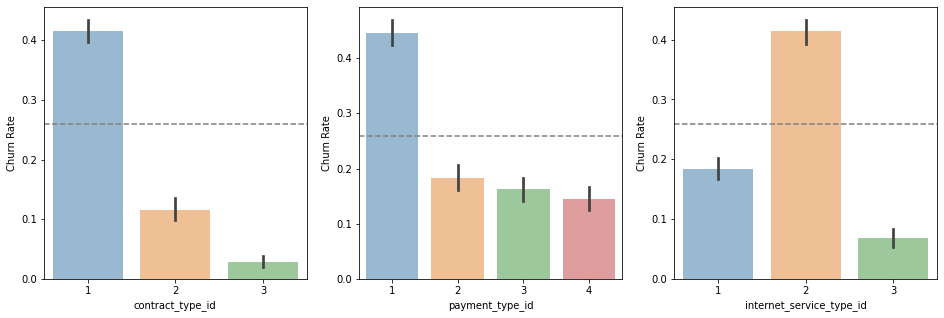

In [12]:
features = ['contract_type_id', 'payment_type_id', 'internet_service_type_id']
            
            #'partner', 'dependents', 'phone_service']

_, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5))

churn_rate = train.churn.mean()

for i, feature in enumerate(features):
    sns.barplot(feature, 'churn', data=train, ax=ax[i], alpha=.5)
    ax[i].set_ylabel('Churn Rate')
    ax[i].axhline(churn_rate, ls='--', color='grey')

In [13]:
df.contract_type_id.value_counts()

1    3875
3    1695
2    1473
Name: contract_type_id, dtype: int64

In [14]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,...,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,monthly_charges_scaled,tenure_3_or_less
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,...,Yes,No,Yes,2,2,1,No,False,0.471144,False
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,...,No,Yes,No,1,2,1,No,False,0.414428,False
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,...,No,No,Yes,1,1,2,Yes,False,0.553731,False
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,...,Yes,Yes,Yes,1,1,2,Yes,False,0.793532,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,...,Yes,No,Yes,1,2,2,Yes,False,0.653234,True


### When are people churning?

In [15]:

pd.set_option("display.max_rows", None, "display.max_columns", None)

df.tenure.value_counts().sort_values(ascending=True)

36     50
44     51
39     56
28     57
38     59
59     60
45     61
21     63
55     64
33     64
48     64
40     64
42     65
34     65
43     65
31     65
37     65
57     65
49     66
58     67
47     68
50     68
54     68
51     68
32     69
41     70
62     70
53     70
20     71
29     72
27     72
63     72
30     72
19     73
46     74
60     76
61     76
14     76
65     76
25     79
26     79
56     80
52     80
64     80
16     80
23     85
17     87
35     88
66     89
22     90
24     94
69     95
18     97
67     98
15     99
11     99
68    100
13    109
6     110
10    116
12    117
9     119
70    119
8     123
7     131
5     133
71    170
4     176
3     200
2     238
72    362
1     624
Name: tenure, dtype: int64

In [16]:
# how many customers do we have?
total_customers = df.customer_id.count()

total_customers

7043

In [17]:
# of people churning in the first 3 months
churn_in_3 = df[df.tenure <= 3]

churn_in_3.count()

customer_id                 1062
gender                      1062
senior_citizen              1062
partner                     1062
dependents                  1062
tenure                      1062
monthly_charges             1062
total_charges               1062
phone_service               1062
multiple_lines              1062
online_security             1062
online_backup               1062
device_protection           1062
tech_support                1062
streaming_tv                1062
streaming_movies            1062
paperless_billing           1062
contract_type_id            1062
payment_type_id             1062
internet_service_type_id    1062
churn                       1062
automatic_payment           1062
monthly_charges_scaled      1062
tenure_3_or_less            1062
dtype: int64

In [18]:
churn_in_3.senior_citizen.value_counts()

0    908
1    154
Name: senior_citizen, dtype: int64

In [19]:
churn_in_3.automatic_payment.value_counts()

False    912
True     150
Name: automatic_payment, dtype: int64

In [20]:
# percentage of people churning in first 3 months
1062 / 7043

0.15078801647025417

In [21]:
# percentage of those churning in the first month of those churning in 3
624 / 1062

0.5875706214689266

>15% of our customers are churning in the first 3 months of our service, 58% of those who churn in the first 3 months are churning in the first month of service

In [22]:
churn_in_6 = df[df.tenure <= 6]

churn_in_6.count()

customer_id                 1481
gender                      1481
senior_citizen              1481
partner                     1481
dependents                  1481
tenure                      1481
monthly_charges             1481
total_charges               1481
phone_service               1481
multiple_lines              1481
online_security             1481
online_backup               1481
device_protection           1481
tech_support                1481
streaming_tv                1481
streaming_movies            1481
paperless_billing           1481
contract_type_id            1481
payment_type_id             1481
internet_service_type_id    1481
churn                       1481
automatic_payment           1481
monthly_charges_scaled      1481
tenure_3_or_less            1481
dtype: int64

In [23]:
churn_in_6.senior_citizen.value_counts()

0    1264
1     217
Name: senior_citizen, dtype: int64

In [24]:
churn_in_6.automatic_payment.value_counts()

False    1236
True      245
Name: automatic_payment, dtype: int64

In [25]:
# percentage of customers churning in first 6 months
1481 / 7043

0.21027971035070284

In [26]:
# percentage of those leaving in the first 3 months of those churning in 6
1062 / 1481 

0.7170830519918974

In [27]:
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
monthly_charges             7043 non-null float64
total_charges               7043 non-null float64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
contract_type_id            7043 non-null int64
payment_type

In [86]:
# what percent of customers enrolled in our month to month service are churning?
df[df['contract_type_id'] == 1].churn.value_counts()

No     2220
Yes    1655
Name: churn, dtype: int64

In [87]:
1655 / 2220

0.7454954954954955

In [91]:
# what percent of customers enrolled in our month to month service are churning?
df[df['senior_citizen'] == 1].churn.value_counts()

No     666
Yes    476
Name: churn, dtype: int64

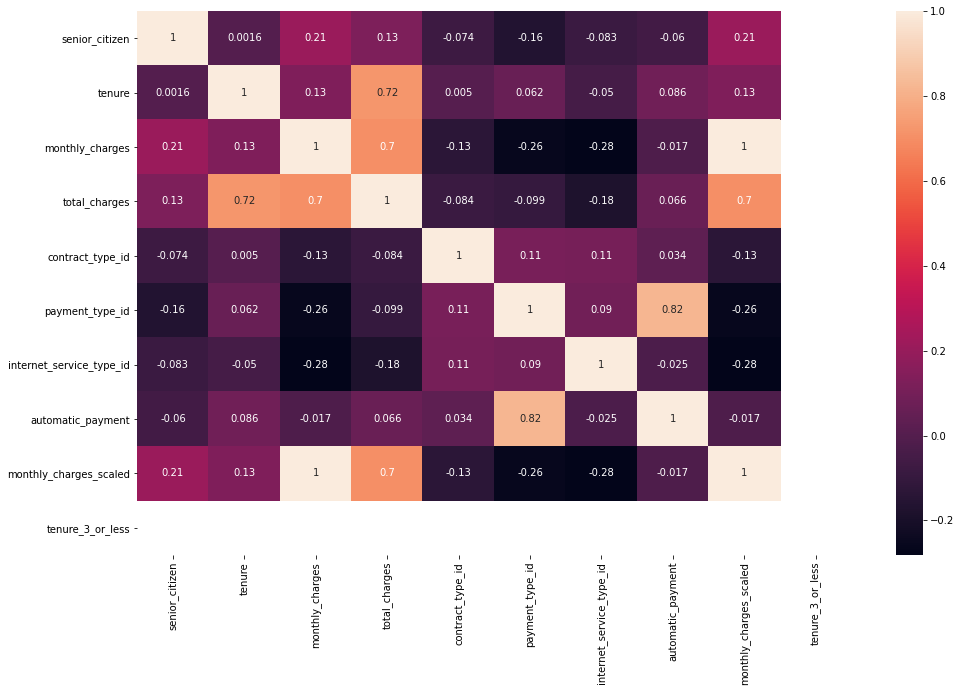

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(churn_in_3.corr(), annot=True)

## Is there a certain price people are paying where they are more likely to churn?

In [29]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,monthly_charges_scaled,tenure_3_or_less
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,No,Yes,No,Yes,Yes,No,Yes,2,2,1,No,False,0.471144,False
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,No,No,No,No,No,Yes,No,1,2,1,No,False,0.414428,False
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,No,No,Yes,No,No,No,Yes,1,1,2,Yes,False,0.553731,False
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,1,1,2,Yes,False,0.793532,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,No,No,No,Yes,Yes,No,Yes,1,2,2,Yes,False,0.653234,True


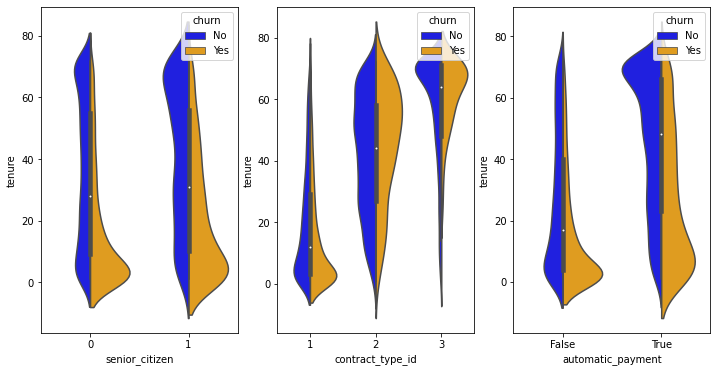

In [30]:
features = ['senior_citizen', 'contract_type_id', 'automatic_payment']
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, feature in enumerate(features):
    sns.violinplot(feature, 'tenure', hue='churn',
        data=df, split=True, ax=ax[i], palette=['blue','orange'])

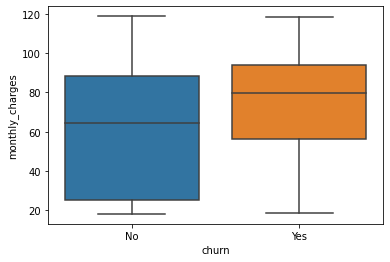

In [31]:
# distribution of churn
sns.boxplot(x='churn', y='monthly_charges', data=df)

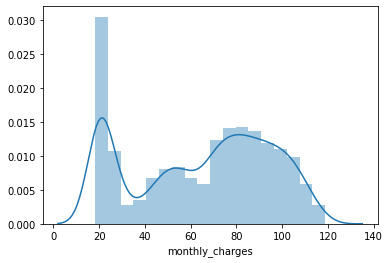

In [32]:
encoder = LabelEncoder()

encoder.fit(df.churn)
df.encoded = encoder.transform(df.churn)
x = df.monthly_charges
sns.distplot(x)

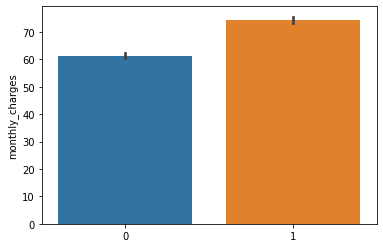

In [33]:
sns.barplot(y=df.monthly_charges, x=df.encoded)

$H_0$: people who churn are paying more per month than those who arent\
$H_a$: people who churn are paying the same or less than those who dont churn

In [34]:
# lets run a t-test to see what the probability of someone churning paying more per month
churners = df[df.churn == 'Yes']
t, p = stats.ttest_1samp(churners.monthly_charges, df.monthly_charges.mean())

print(f't = {t:.3f}')
print(f'p = {p:.61f}')

t = 16.965
p = 0.0000000000000000000000000000000000000000000000000000000000037


In [35]:
not_churners = df[df.churn == 'No']

churners.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,monthly_charges_scaled,tenure_3_or_less
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,No,No,Yes,No,No,No,Yes,1,1,2,Yes,False,0.553731,False
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,1,1,2,Yes,False,0.793532,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,No,No,No,Yes,Yes,No,Yes,1,2,2,Yes,False,0.653234,True
18,0022-TCJCI,Male,1,No,No,45,62.7,2791.50,Yes,No,Yes,No,Yes,No,No,Yes,No,2,4,1,Yes,True,0.442289,False
19,0023-HGHWL,Male,1,No,No,1,25.1,25.10,No,No phone service,No,No,No,No,No,No,Yes,1,1,1,Yes,False,0.068159,True


In [36]:
print(f"People who churn are paying ${churners.monthly_charges.mean():.2f} per month with a median of ${churners.monthly_charges.median()}")

People who churn are paying $74.44 per month with a median of $79.65


In [37]:
print(f"The avg per month for all customers ${df.monthly_charges.mean():.2f}, and per month with a median of ${df.monthly_charges.median()}")

The avg per month for all customers $64.76, and per month with a median of $70.35


In [38]:
print(f"People who are still with us are paying ${not_churners.monthly_charges.mean():.2f} per month with a median of ${not_churners.monthly_charges.median():.2f}")

People who are still with us are paying $61.27 per month with a median of $64.43


In [39]:
churners.describe()

,senior_citizen,tenure,monthly_charges,total_charges,contract_type_id,payment_type_id,internet_service_type_id,monthly_charges_scaled
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,17.979133,74.441332,1531.796094,1.140182,1.813269,1.814874,0.559118
std,0.435799,19.531123,24.666053,1890.822994,0.414714,1.083216,0.521459,0.245433
min,0.000000,1.000000,18.850000,18.850000,1.000000,1.000000,1.000000,0.005970
25%,0.000000,2.000000,56.150000,134.500000,1.000000,1.000000,2.000000,0.377114
50%,0.000000,10.000000,79.650000,703.550000,1.000000,1.000000,2.000000,0.610945
75%,1.000000,29.000000,94.200000,2331.300000,1.000000,3.000000,2.000000,0.755721
max,1.000000,72.000000,118.350000,8684.800000,3.000000,4.000000,3.000000,0.996020


In [40]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,monthly_charges_scaled,tenure_3_or_less
3925,5522-NYKPB,1,0,1,1,25,85.90,2199.05,1,0,0,0,0,2,2,0,0,1,1,2,0,False,0.673134,False
5506,7753-USQYQ,1,0,0,0,55,64.20,3627.30,1,0,0,2,0,2,0,2,1,2,1,1,0,False,0.457214,False
21,0023-XUOPT,0,0,1,0,13,94.10,1215.60,1,2,0,2,2,0,2,0,0,1,1,2,1,False,0.754726,False
3002,4298-OYIFC,1,0,1,0,15,103.45,1539.80,1,2,0,0,2,2,2,2,1,1,1,2,0,False,0.847761,False
3429,4859-ZSRDZ,0,0,1,1,58,55.50,3166.90,0,1,0,0,2,2,2,2,1,3,4,1,0,True,0.370647,False


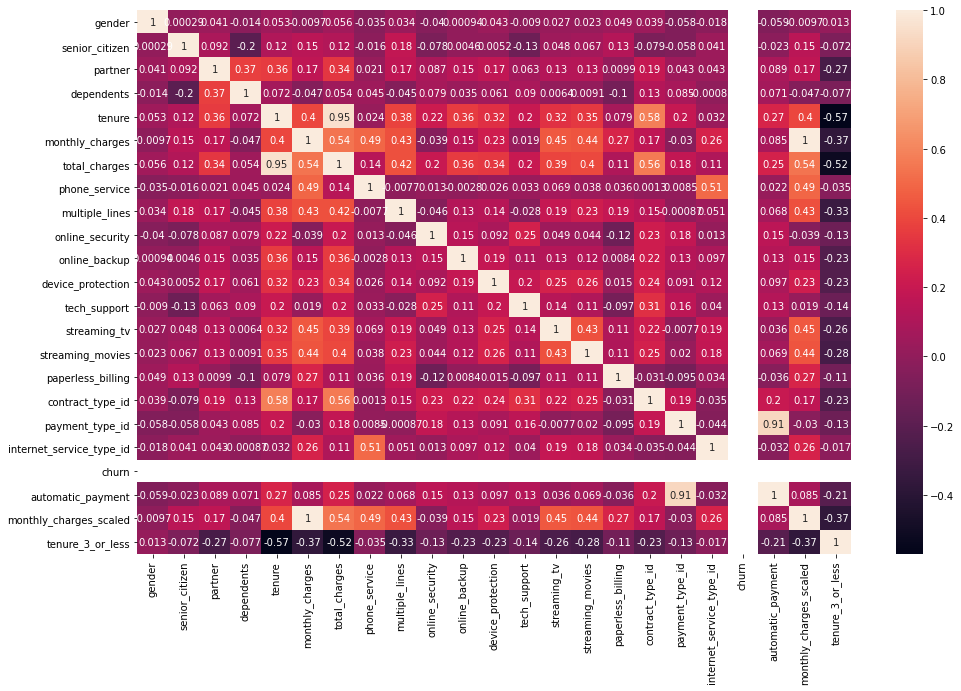

In [41]:
train_churners = train[train.churn == 1]

plt.figure(figsize=(16,10))
sns.heatmap(train_churners.corr(), annot=True)

In [42]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,monthly_charges,total_charges,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,contract_type_id,payment_type_id,internet_service_type_id,churn,automatic_payment,monthly_charges_scaled,tenure_3_or_less
0,0002-ORFBO,Female,0,Yes,Yes,9,65.6,593.30,Yes,No,No,Yes,No,Yes,Yes,No,Yes,2,2,1,No,False,0.471144,False
1,0003-MKNFE,Male,0,No,No,9,59.9,542.40,Yes,Yes,No,No,No,No,No,Yes,No,1,2,1,No,False,0.414428,False
2,0004-TLHLJ,Male,0,No,No,4,73.9,280.85,Yes,No,No,No,Yes,No,No,No,Yes,1,1,2,Yes,False,0.553731,False
3,0011-IGKFF,Male,1,Yes,No,13,98.0,1237.85,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,1,1,2,Yes,False,0.793532,False
4,0013-EXCHZ,Female,1,Yes,No,3,83.9,267.40,Yes,No,No,No,No,Yes,Yes,No,Yes,1,2,2,Yes,False,0.653234,True


### modeling

In [43]:
# creating our X, y and validate datasets

train, validate = train_test_split(train, random_state=123, test_size=.2)


X_train = train[['senior_citizen', 'monthly_charges_scaled', 'tenure_3_or_less', 'contract_type_id']]
y_train = train[['churn']]
X_val = validate[['senior_citizen', 'monthly_charges_scaled', 'tenure_3_or_less', 'contract_type_id']]
y_val = validate[['churn']]
X_test = test[['senior_citizen', 'monthly_charges_scaled', 'tenure_3_or_less', 'contract_type_id']]
y_test = test[['churn']]

# KNN

In [44]:
# training and fitting a k-nearest neighbors algorithim to our training data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [45]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.82


In [46]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,2870,257
1,488,610


In [47]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3127
           1       0.70      0.56      0.62      1098

    accuracy                           0.82      4225
   macro avg       0.78      0.74      0.75      4225
weighted avg       0.82      0.82      0.82      4225



### Accuracy on validation set

In [48]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on validate set: 0.78


### messing with something i found on towards data science lol

([<matplotlib.axis.XTick at 0x12646b8d0>,
 <a list of 5 Text major ticklabel objects>)

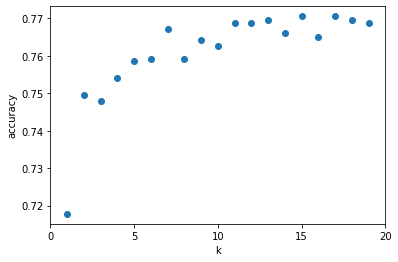

In [49]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [50]:
X = train[['senior_citizen', 'monthly_charges_scaled', 'tenure_3_or_less', 'paperless_billing', 'contract_type_id']]
y = train.churn.to_numpy()
y[0:5]

array([0, 0, 0, 0, 1])

In [51]:
# cross validation is suppose to make our model more accurate somehow...blackbox'in'itt
from sklearn.model_selection import cross_val_score
import numpy as np

#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.73758865 0.76950355 0.74319527 0.77014218 0.75236967]
cv_scores mean:0.7545598626389964


In [52]:
# hypertuning mode parameters
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 24}

In [54]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.7746745562130177

## Random Forest 

In [55]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [56]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [57]:
# evaluating model
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.78


In [58]:
pd.DataFrame(confusion_matrix(y_train, y_pred))

,0,1
0,3049,78
1,869,229


In [59]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      3127
           1       0.75      0.21      0.33      1098

    accuracy                           0.78      4225
   macro avg       0.76      0.59      0.60      4225
weighted avg       0.77      0.78      0.73      4225



### Validate scores

In [60]:
print('Accuracy of random forest classifier on val set: {:.2f}'
     .format(rf.score(X_val, y_val)))

Accuracy of random forest classifier on val set: 0.77


# Test score

In [61]:
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on validate set: 0.77


In [62]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1761 entries, 5759 to 3038
Data columns (total 4 columns):
senior_citizen            1761 non-null int64
monthly_charges_scaled    1761 non-null float64
tenure_3_or_less          1761 non-null bool
contract_type_id          1761 non-null int64
dtypes: bool(1), float64(1), int64(2)
memory usage: 56.8 KB


In [63]:
X_test

,senior_citizen,monthly_charges_scaled,tenure_3_or_less,contract_type_id
5759,0,0.930846,False,3
3438,0,0.017413,True,1
473,0,0.013930,False,1
679,1,0.273632,False,1
1116,0,0.664179,True,1
905,0,0.897015,False,3
1757,0,0.808458,False,1
4967,0,0.899502,False,3
1390,0,0.870647,False,2
1479,0,0.613930,False,1


## creating a CSV
- customer ID
- probability of churn
- prediction of churn

#### using the most accurate model: RF

In [64]:
# now we concat all of our data frames so we have a good index
rf_predictions = pd.concat([X_train, X_test, X_val])

In [65]:
rf_predictions.head()

,senior_citizen,monthly_charges_scaled,tenure_3_or_less,contract_type_id
4497,0,0.066169,False,1
3870,0,0.313930,False,1
2438,0,0.417910,False,2
4896,0,0.710448,False,1
209,1,0.815423,False,1


In [66]:
# we add our predictions
y_pred = rf.predict(rf_predictions)

y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [67]:
# we add our probabilities
y_pred_proba = rf.predict_proba(rf_predictions)

y_pred_proba

array([[0.76632448, 0.23367552],
       [0.75101512, 0.24898488],
       [0.93782553, 0.06217447],
       ...,
       [0.57896019, 0.42103981],
       [0.35787814, 0.64212186],
       [0.76632448, 0.23367552]])

In [68]:
# now we put it all together
predictions = pd.DataFrame(
    {'Customer_ID': df.customer_id,
     'Stay_Probability': y_pred_proba[:,0],
        'Churn_Probability': y_pred_proba[:,1],
     'Churn_Prediction': y_pred})

In [69]:
predictions['actual'] = df.churn

In [70]:
predictions.sample(50)

,Customer_ID,Stay_Probability,Churn_Probability,Churn_Prediction,actual
2384,3413-BMNZE,0.520042,0.479958,0,No
5046,7096-ZNBZI,0.972270,0.027730,0,No
4437,6257-DTAYD,0.855504,0.144496,0,No
728,1074-WVEVG,0.652864,0.347136,0,No
6947,9851-KIELU,0.687744,0.312256,0,Yes
2148,3082-WQRVY,0.766324,0.233676,0,No
6171,8739-QOTTN,0.968836,0.031164,0,No
7006,9940-HPQPG,0.520042,0.479958,0,Yes
1957,2834-JKOOW,0.356705,0.643295,1,No
3110,4458-KVRBJ,0.978417,0.021583,0,No


In [71]:
predictions.Churn_Prediction.sum() / 5174

0.09547738693467336

In [72]:
predictions.groupby('actual').count()

,Customer_ID,Stay_Probability,Churn_Probability,Churn_Prediction
actual,,,,
No,5174,5174,5174,5174
Yes,1869,1869,1869,1869


In [73]:
1869 / 5174

0.36122922303826827

In [74]:
predictions.to_csv('telco_churn_predictions.csv')